# Single Pendulum Synchronization

In [1]:
# importing relevant libraries
import numpy as np
from matplotlib import pyplot as plt
import math
import random
from scipy.integrate import odeint

In [2]:
def single_kuramoto_with_noise(z, t, L, g, K, noise_strength):
    """
    Kuramoto model for two single pendulums with added noise to angular velocities.
    """
    theta, w, theta_second, w_second = z
    num_of_pendulums = 2
    for i in range(num_of_pendulums):
        counter1 = 0
        for j in range(num_of_pendulums):
            if i != j:
                if i == 0:
                    counter1 += np.sin(theta_second - theta)
                if i == 1:
                    counter1 += np.sin(theta - theta_second)
        if i == 0:
            w += (K * counter1) / num_of_pendulums
            w += noise_strength * np.random.randn()  # Adding noise to the angular velocity
        if i == 1:
            w_second += (K * counter1) / num_of_pendulums
            w_second += noise_strength * np.random.randn()  # Adding noise to the angular velocity

    wdot = -np.sin(theta) * g / L
    wdot_second = -np.sin(theta_second) * g / L
    return w, wdot, w_second, wdot_second

In [3]:
# System constants
g = 9.81
L = 1.0
K = 0.3
noise_strength = 0.0001  # can be adjusted to see the effect of noise on the system

z0_single = [
    3 * np.pi / 4.0, 1.0, np.pi / 4.0, 4.0,
]  # initializing both single pendulums

In [4]:
tmax, dt = 50, 0.01
t = np.arange(0, tmax + dt, dt)

# Simulation with zero noise strength
z_no_noise = odeint(single_kuramoto_with_noise, z0_single, t, args=(L, g, K, 0))
theta1_no_noise, w1_no_noise, theta2_no_noise, w2_no_noise = z_no_noise[:, 0], z_no_noise[:, 1], z_no_noise[:, 2], z_no_noise[:, 3]

# Simulation with finite noise strength
z_with_noise = odeint(single_kuramoto_with_noise, z0_single, t, args=(L, g, K, noise_strength))
theta1_with_noise, w1_with_noise, theta2_with_noise, w2_with_noise = z_with_noise[:, 0], z_with_noise[:, 1], z_with_noise[:, 2], z_with_noise[:, 3]

c:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [5]:
def plot_single_pendulum(t, theta1_no_noise, theta2_no_noise, theta1_with_noise, theta2_with_noise, noise_strength, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t, theta1_no_noise, label='Pendulum 1 (No Noise)')
    plt.plot(t, theta2_no_noise, label=f'Pendulum 2 (No Noise)')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.title(f'{title}\nTime Series Analysis')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(t, theta1_with_noise, label=f'Pendulum 1 (Noise Strength: {noise_strength})')
    plt.plot(t, theta2_with_noise, label=f'Pendulum 2 (Noise Strength: {noise_strength})')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular (rad)')
    plt.title(f'{title}\nTime Series Analysis')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.savefig("plots/timeseries_single_pendulum.pdf")
    plt.show()


def plot_phase_space(theta1_no_noise, w1_no_noise, theta2_no_noise, w2_no_noise, theta1_with_noise, w1_with_noise, theta2_with_noise, w2_with_noise, noise_strength, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(theta1_no_noise, w1_no_noise, label='Pendulum 1 (No Noise)')
    plt.plot(theta2_no_noise, w2_no_noise, label=f'Pendulum 2 (No Noise)')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\omega$ (rad/s)')
    plt.title(f'{title}\nPhase Space Plot')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(theta1_with_noise, w1_with_noise, label=f'Pendulum (Noise Strength: {noise_strength})')
    plt.plot(theta2_with_noise, w2_with_noise, label=f'Pendulum (Noise Strength: {noise_strength})')
    plt.xlabel(r'$\theta$ (rad)')
    plt.ylabel(r'$\omega$ (rad/s)')
    plt.title(f'{title}\nPhase Space Plot')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.savefig("plots/phasepace_single_pendulum.pdf")
    plt.show()

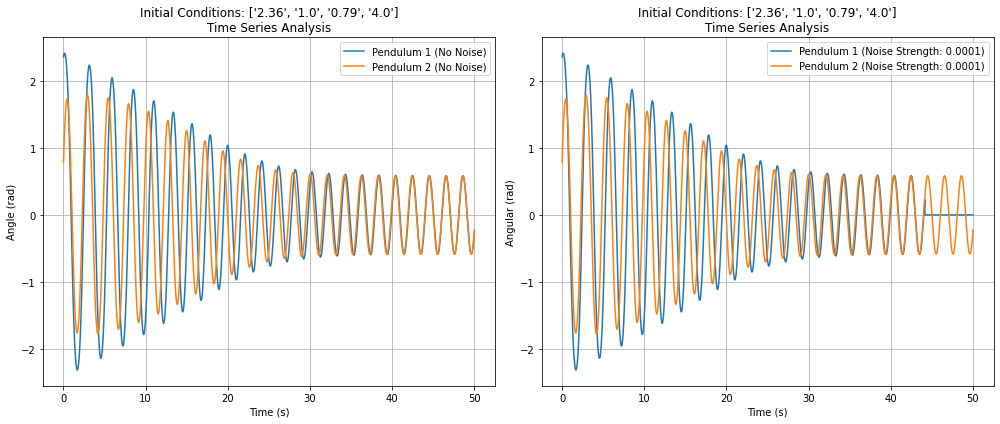

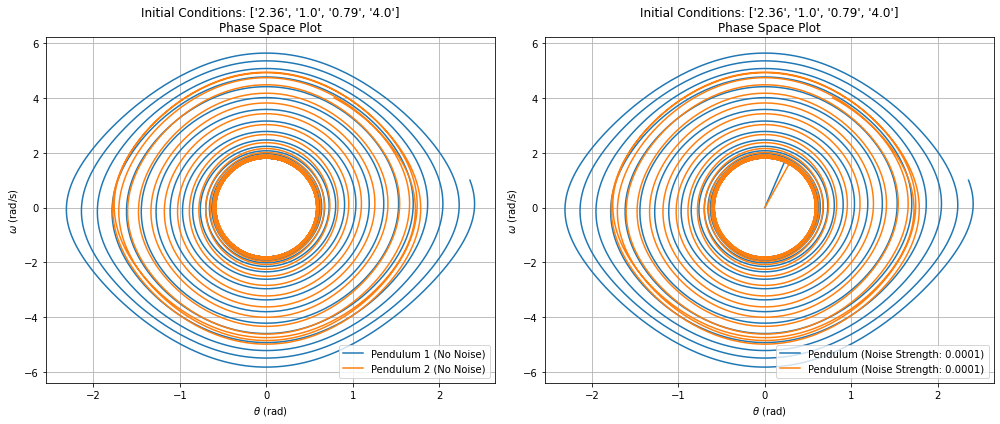

In [6]:
# Convert initial conditions to strings for plot titles
z0_str = [f'{z0_single[i]:.2f}' if i % 2 == 0 else f'{z0_single[i]:.1f}' for i in range(len(z0_single))]

plot_single_pendulum(t, theta1_no_noise, theta2_no_noise, theta1_with_noise, theta2_no_noise, noise_strength, f'Initial Conditions: {z0_str}')
plot_phase_space(theta1_no_noise, w1_no_noise, theta2_no_noise, w2_no_noise, theta1_with_noise, w1_with_noise, theta2_with_noise, w2_with_noise, noise_strength, f'Initial Conditions: {z0_str}')

In [7]:
def computations(time, oscillator_i):
    """
    Uses the Kuramoto model and
    two parameters (current time and one pendulum)
    to compute the phase difference for each iteration
    """
    counter = 0
    for oscillator_j in range(0, num_of_pendulums):
        if oscillator_j != oscillator_i:
            counter += math.sin(
                pendulum_vals_previous[oscillator_j]
                - pendulum_vals_previous[oscillator_i]
            )
    pendulum_vals_new[oscillator_i] = (
        pendulum_vals_previous[oscillator_i] + (K * counter) / num_of_pendulums
    )
    standard_deviation_temp.append(pendulum_vals_new[oscillator_i])
    y_axis[oscillator_i].append(math.sin(time + pendulum_vals_new[oscillator_i]))


K_vals = []
synchronization_locations = []
for K in np.arange(0.01, 1.1, 0.01):
    K_vals.append(K)
    num_of_pendulums = 13
    current_time = [0]
    y_axis = []
    time_x_limit = 100
    standard_deviation_threshhold = 0.008
    standard_deviation_temp = []
    pendulum_vals_std = []
    pendulum_vals_previous = []
    for i in range(1, num_of_pendulums + 1):
        pendulum_vals_previous.append(random.uniform(-np.pi / 2, np.pi / 2))
    pendulum_vals_new = pendulum_vals_previous.copy()
    pendulum_vals_std.append(np.std(pendulum_vals_new))
    for i in range(0, num_of_pendulums):
        y_axis.append([math.sin(pendulum_vals_new[i])])
    for time in np.arange(0.05, time_x_limit, 0.05):
        standard_deviation_temp.clear()
        current_time.append(time)
        for individual_pendulum in range(num_of_pendulums):
            computations(time, individual_pendulum)
        pendulum_vals_std.append(np.std(standard_deviation_temp))
        for individual_pendulum in range(num_of_pendulums):
            pendulum_vals_previous[individual_pendulum] = pendulum_vals_new[
                individual_pendulum
            ]
    for value in pendulum_vals_std:
        if value < standard_deviation_threshhold:
            synchronization_std_point = value
            break
    synchronization_locations.append(
        current_time[pendulum_vals_std.index(synchronization_std_point)]
    )

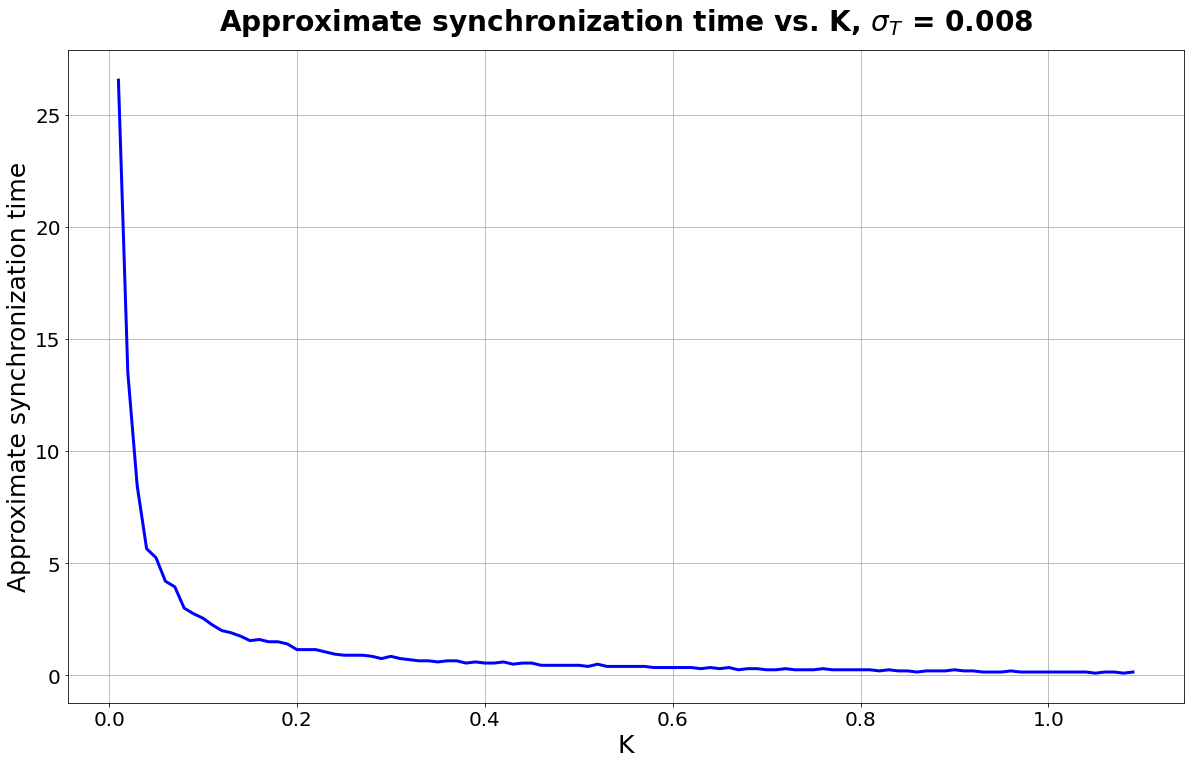

In [8]:
plt.figure(figsize=(20, 12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(K_vals, synchronization_locations, linewidth=3, color="blue")
plt.title(
    r"Approximate synchronization time vs. K, $\sigma_T$"
    + " = "
    + f"{standard_deviation_threshhold}",
    fontsize=28,
    pad=20,
    fontweight="bold"
)
plt.xlabel("K", fontsize=25)
plt.ylabel("Approximate synchronization time", fontsize=25)
plt.grid(linestyle="-")
plt.savefig("plots/synchronization_time.pdf")
plt.show()

In [9]:
def single_pendulum_computations(t): #computations for single pendulum
    for oscillator_i in range(0, number_of_pendulums):
        error = 0
        for oscillator_j in range(0, number_of_pendulums):
            if oscillator_j != oscillator_i:
                error += math.sin(
                    current_positions[oscillator_j] - current_positions[oscillator_i]
                )
        new_positions[oscillator_i] = (
            current_positions[oscillator_i]
            + (coupling_strength_K * error) / number_of_pendulums
        )
        updated_positions.append(new_positions[oscillator_i])
        position_axis[oscillator_i].append(math.sin(t + new_positions[oscillator_i]))

In [10]:
# System constants
number_of_pendulums = 70
coupling_strength_K = 0.07
# Axes configuration
time_axis = [0]
position_axis = []
# Time axis configuration
time_start = 0.05
time_stop = 5
time_step = 0.05
# Standard deviation configuration
standard_deviation_threshhold = 0.008
standard_deviation_pendulum_positions = []
# Position storage configuation
updated_positions = []
current_positions = []

In [11]:
for i in range(number_of_pendulums):
    current_positions.append(random.uniform(-np.pi / 2, np.pi / 2))
new_positions = current_positions.copy()
standard_deviation_pendulum_positions.append(np.std(new_positions))
for i in range(number_of_pendulums):
    position_axis.append([math.sin(new_positions[i])])
for time in np.arange(time_start, time_stop, time_step):
    updated_positions.clear()
    time_axis.append(time)
    single_pendulum_computations(time)
    standard_deviation_pendulum_positions.append(np.std(updated_positions))
    for individual_pendulum in range(number_of_pendulums):
        current_positions[individual_pendulum] = new_positions[individual_pendulum]

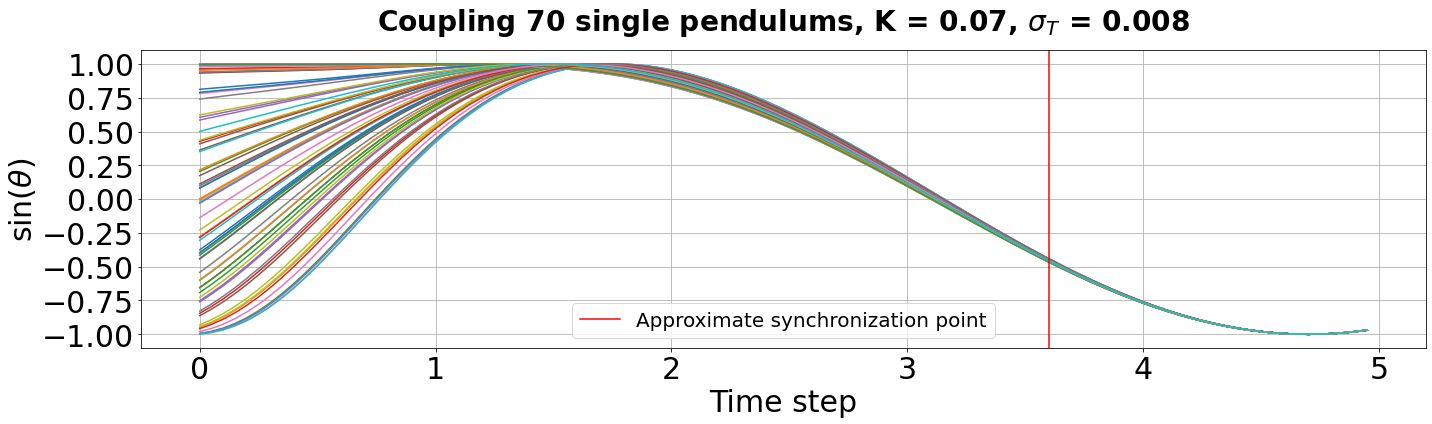

In [12]:
plt.figure(figsize=(20, 6))
for i in range(0, number_of_pendulums):
    plt.plot(time_axis, position_axis[i])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time step", fontsize=30)
plt.ylabel(r"$\sin(\theta)$", fontsize=30)

plt.title(
    rf"Coupling {number_of_pendulums} single pendulums, K = {coupling_strength_K}, $\sigma_T$ = {standard_deviation_threshhold}",
    fontsize=28,
    pad=20,
    fontweight="bold"
)

synchronization_time = 0
for standard_deviation in standard_deviation_pendulum_positions:
    if standard_deviation < standard_deviation_threshhold:
        synchronization_time = standard_deviation
        break
if synchronization_time == 0:
    print(
        f"No synchronization found with standard deviation less than {standard_deviation_threshhold} and K = {coupling_strength_K} coupling strength"
    )
else:
    plt.axvline(
        x=time_axis[standard_deviation_pendulum_positions.index(synchronization_time)],
        color="r",
        label="Approximate synchronization point",
    )
plt.legend(prop={"size": 20})
plt.grid(linestyle="-")
plt.tight_layout()
plt.savefig("plots/synchronization_single_pendulum.pdf")
plt.show()